# imports

In [207]:
# import necessary libraries
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
import os

In [208]:
# Data types for less memory usage
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [209]:
def convert_types(df):
    # Convert data types to reduce memory
    for c in df:
        col_type = str(df[c].dtypes)
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        
        # Convert objects to category
        if col_type == 'object':
            df[c] = df[c].astype('category')
        
        # numerics
        elif col_type in numerics:
            c_min = df[c].min()
            c_max = df[c].max()
            if col_type[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[c] = df[c].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[c] = df[c].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[c] = df[c].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[c] = df[c].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[c] = df[c].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[c] = df[c].astype(np.float32)
                else:
                    df[c] = df[c].astype(np.float64)  
        
    return df

# load the data

In [210]:
train=dd.read_csv('../data/train.csv',dtype=dtypes)
train=train.compute()

In [211]:
train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [212]:
train.shape

(8921483, 83)

In [213]:
# store hasdetections for later user
target = train['HasDetections']

In [214]:
train=convert_types(train)

# Delete columns with high missing values

In [215]:
# checking missing data
def missing_values(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [216]:
# checking missing train data
missing_train_data=missing_values(train)

In [217]:
missing_train_data.head(10)

,Total,Percent
PuaMode,8919174,99.974119
Census_ProcessorClass,8884852,99.589407
DefaultBrowsersIdentifier,8488045,95.141637
Census_IsFlightingInternal,7408759,83.044030
Census_InternalBatteryType,6338429,71.046809
Census_ThresholdOptIn,5667325,63.524472
Census_IsWIMBootEnabled,5659703,63.439038
SmartScreen,3177011,35.610795
OrganizationIdentifier,2751518,30.841487
SMode,537759,6.027686


In [218]:
# removing the features that are with missing values with above 50%, 
#since replacing them with statistical values wont make much sense
cols_to_drop=['PuaMode',
              'Census_ProcessorClass',
              'DefaultBrowsersIdentifier',
              'Census_IsFlightingInternal',
              'Census_InternalBatteryType',
              'Census_ThresholdOptIn',
              'Census_IsWIMBootEnabled']

In [219]:
train=train.drop(cols_to_drop,axis=1)

In [220]:
len(train.columns)

76

# Delete skewed data

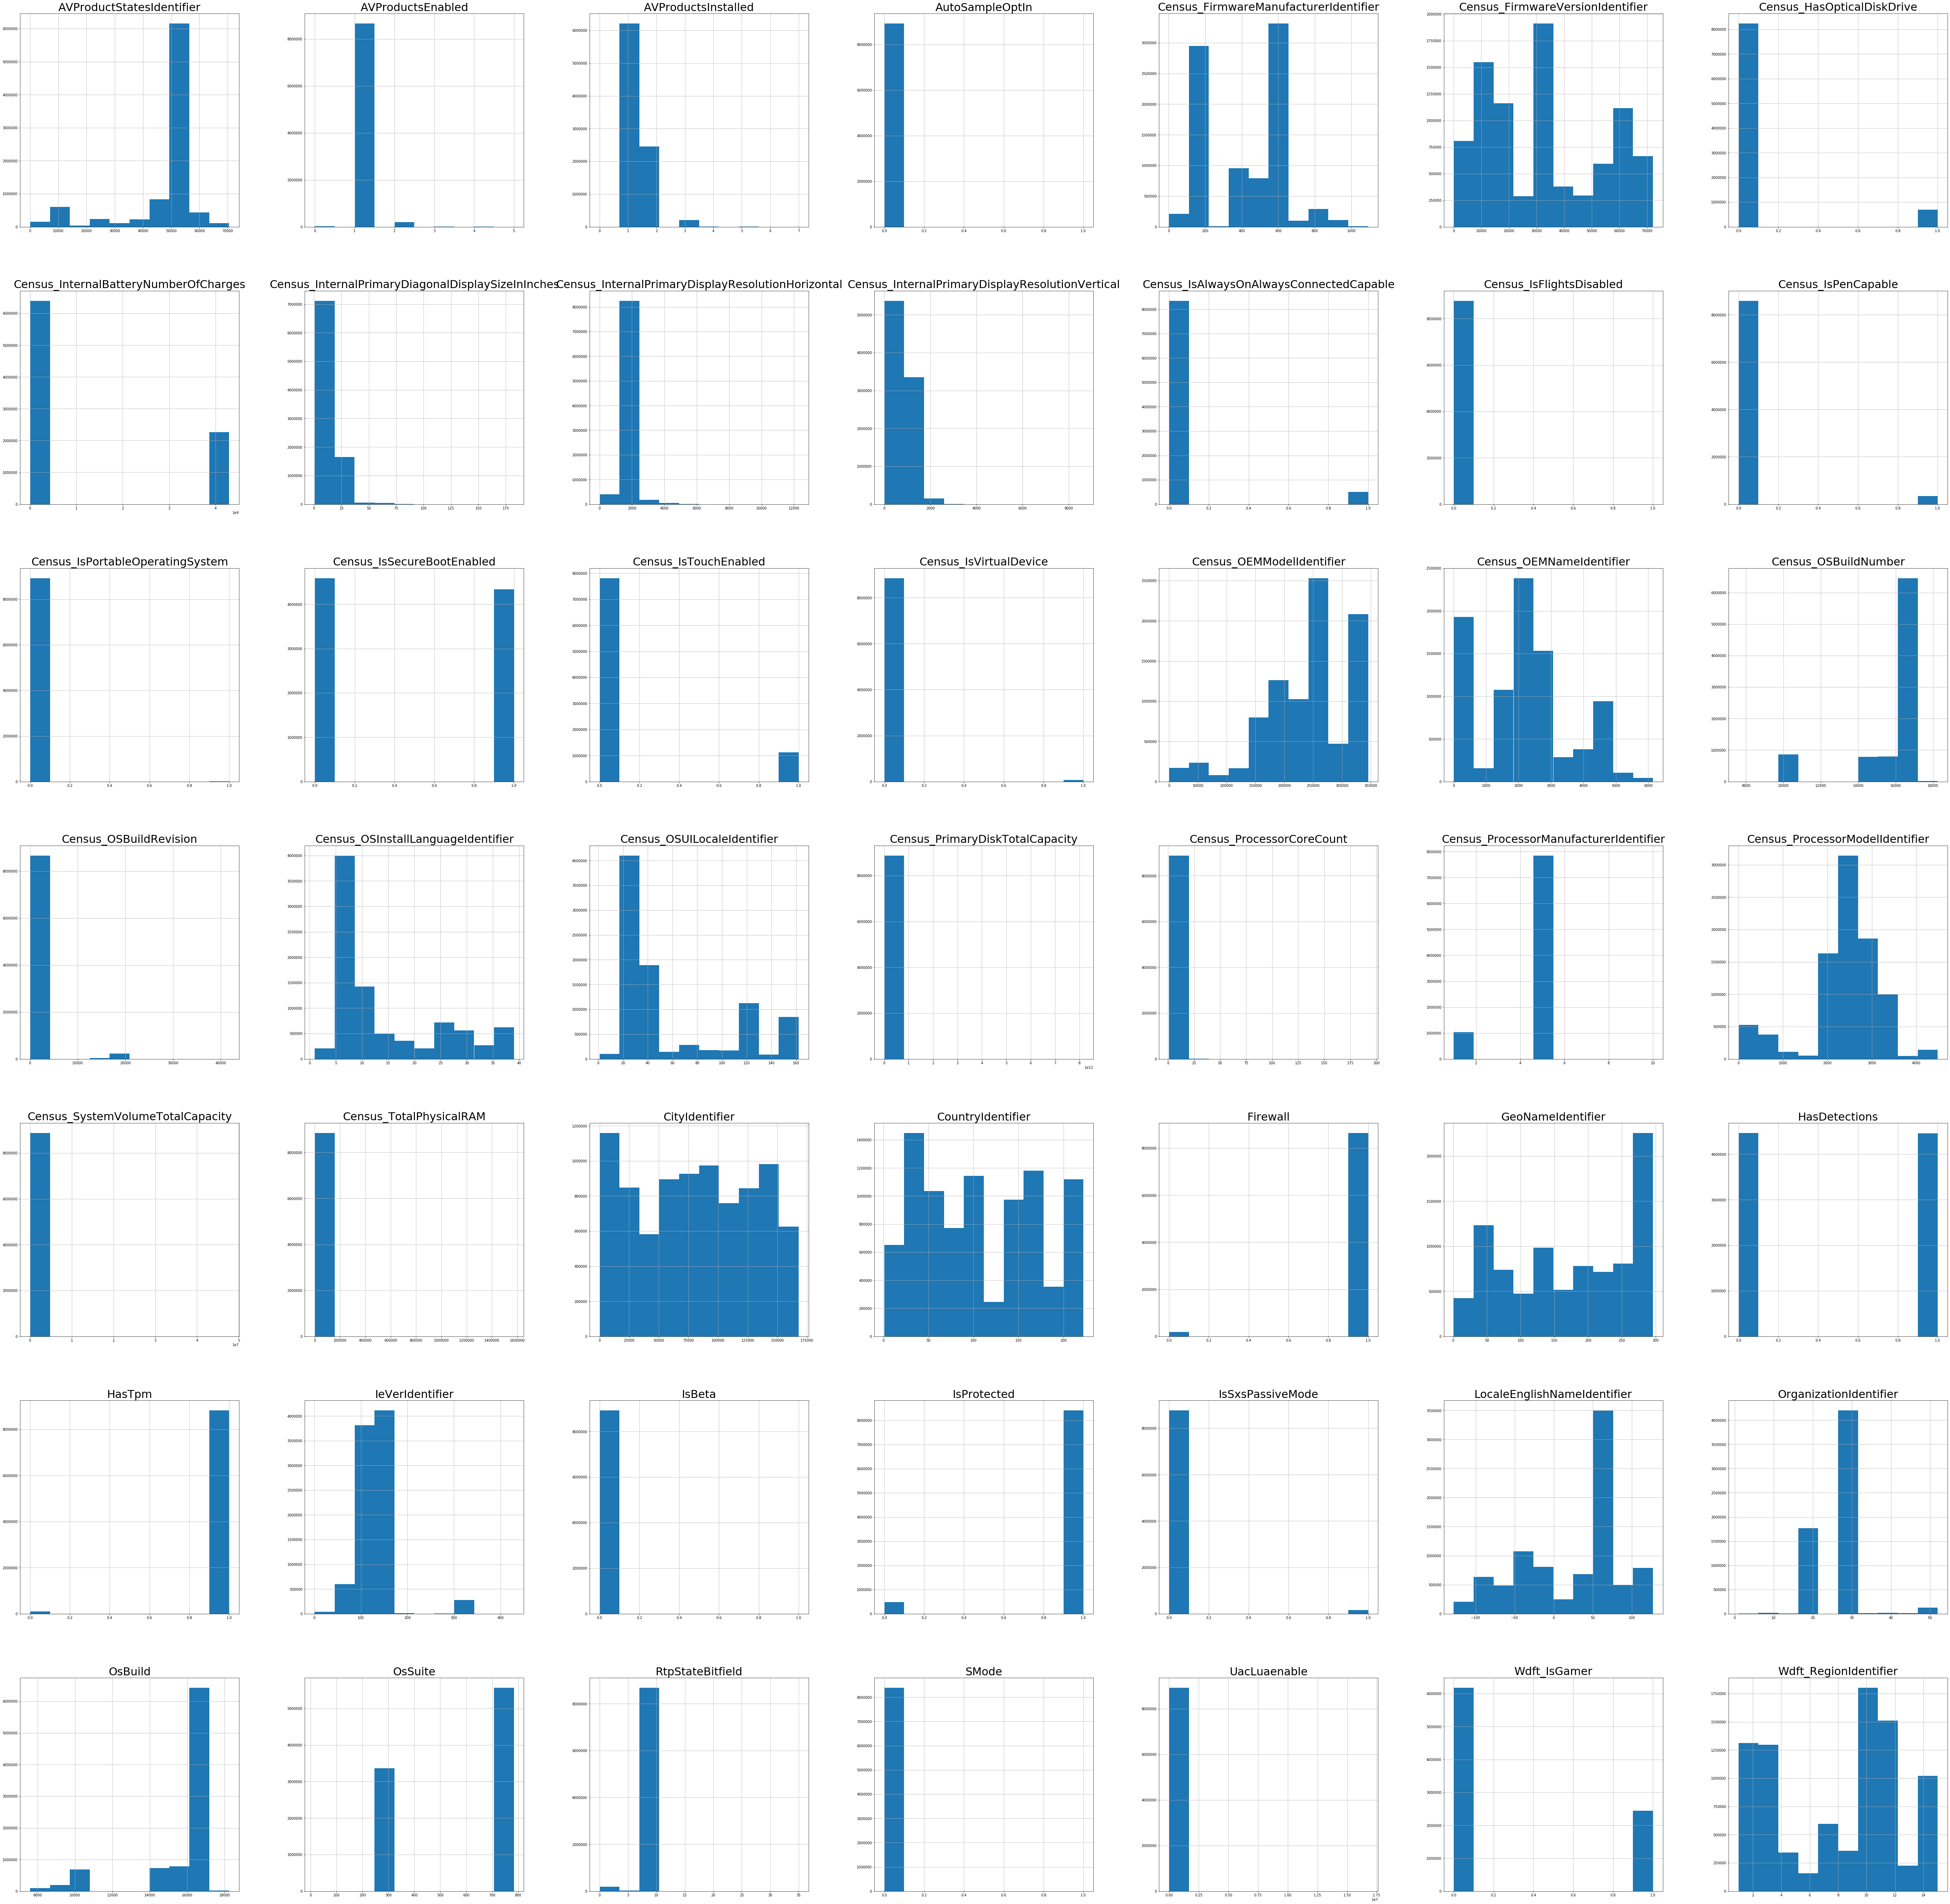

In [221]:
fig=train.hist(bins=10,figsize=(100,100))
[x.title.set_size(32) for x in fig.ravel()]
plt.show()

In [222]:
dict={}
for col in list(train.columns):
    val=train[col].value_counts()
    dict[col]=val

In [223]:
dict

{'MachineIdentifier': ffffff75ba4f33d938ccfdb148b8ea16    1
 555230d9125241ea09d2964cab0dde73    1
 5552388719990067c5d69db11a0be3d6    1
 5552378fba13284141c48d06d26fb303    1
 555236649a01545c9f0ded3dcfc14458    1
 5552359155ce0a3db7a938848ed850f0    1
 555234190b29fe1e2fbca4441fe24c8f    1
 5552322bf329cf4a02fadc0480b64839    1
 55522fbe1bd31bca30b09040feebb251    1
 5550e1b1f4ee77af97d769340d8eaf97    1
 55522fade33621026cad18f99abf5714    1
 55522fa3bf36d764969bc7eb8b724c43    1
 55522f614645bcaf6380a3e4451aa8d6    1
 55522f3e6906b350074628609bc68fc7    1
 55522c91e7e2bb9732c35b9b7c38a663    1
 555229b3e6229b8fcf5fdb0468fb3183    1
 55523cd0c0f3b7721efccd749504556a    1
 555241808ca289f5d3e3049c8f44f61f    1
 5552422f35e726a19e496ae05ff2141f    1
 55524576dced4aeea1f022171b67b8b1    1
 5552468e44a3e10c85d174ee75f408d6    1
 555247a3894768f4d6491a1c640c8d71    1
 555248529753c38baf241c20a495b33f    1
 5552489c8741fc954ffb77366d0246e8    1
 555249911688d0af7aa70afefc6804c5    1
 555

In [224]:
biased_cols=['IsBeta','AutoSampleOptIn','Census_IsFlightsDisabled','ProductName','UacLuaenable','Census_InternalBatteryNumberOfCharges' ]

In [225]:
train=train.drop(biased_cols,axis=1)

In [226]:
# reading the data desciption and understanding it, I divided all the columns in to 3 categories
#numerical, binary(boolean), categorical

In [227]:
numerical_features=['Census_InternalPrimaryDiagonalDisplaySizeInInches',
                    'Census_PrimaryDiskTotalCapacity',
                    'Census_ProcessorCoreCount',
                    'Census_SystemVolumeTotalCapacity',
                    'Census_TotalPhysicalRAM']

In [228]:
binary_features=['Census_HasOpticalDiskDrive',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Census_IsPenCapable',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsVirtualDevice',
 'Firewall',
 'HasTpm',
 'IsProtected',
 'IsSxsPassiveMode',
 'SMode',
 'Wdft_IsGamer']

In [229]:
categorical_features=['AppVersion',
 'AVProductsEnabled',
 'AVProductsInstalled',
 'AVProductStatesIdentifier',
 'AvSigVersion',
 'Census_ActivationChannel',
 'Census_ChassisTypeName',
 'Census_DeviceFamily',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_FlightRing',
 'Census_GenuineStateName',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_MDC2FormFactor',
 'Census_OEMModelIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSInstallTypeName',
 'Census_OSSkuName',
 'Census_OSUILocaleIdentifier',
 'Census_OSVersion',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_PowerPlatformRoleName',
 'Census_PrimaryDiskTypeName',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'CityIdentifier',
 'CountryIdentifier',
 'EngineVersion',
 'GeoNameIdentifier',
 'IeVerIdentifier',
 'LocaleEnglishNameIdentifier',
 'MachineIdentifier',
 'OrganizationIdentifier',
 'OsBuild',
 'OsBuildLab',
 'OsPlatformSubRelease',
 'OsSuite',
 'OsVer',
 'Platform',
 'Processor',
 'RtpStateBitfield',
 'SkuEdition',
 'SmartScreen',
 'Wdft_RegionIdentifier']

In [230]:
# create list for encoding and data cleaning on test data
list_frequency_encoding = [] # for features related to versioning
list_nan_minus1 = []
list_nan_0 = []
list_nan_1 = []

# Numerical Features

In [231]:
# replace NaN values with "-1"
# and add features to list list_nan_minus1 for redoing same on testdata
for feature in numerical_features:
    tmp1 = len(train)
    train[feature] = train[feature].fillna(-1)
    list_nan_minus1.append(feature)

# Binary Features

In [232]:
# replace NaN-values with the most fequent value and 
# add features to corespondig list for redoing same on testdata
for feature in binary_features:
    train[feature] = train[feature].fillna(train[feature].mode()[0])
    if train[feature].mode()[0] == 0:
        list_nan_0.append(feature)
    else:
        list_nan_1.append(feature)

# Categorical Features

In [233]:
correct_feature_by_hand = [] 
for feature in categorical_features:
    t = pd.api.types.is_categorical_dtype(train[feature])
    #checking dtype, whether it is categorical or not
    if not t:
        # rename NaN-values to '-1'
        train[feature] = train[feature].fillna(-1)
        list_nan_minus1.append(feature)
    else:
        # add to list, to look at features
        correct_feature_by_hand.append(feature)

In [234]:
correct_feature_by_hand

['AppVersion',
 'AvSigVersion',
 'Census_ActivationChannel',
 'Census_ChassisTypeName',
 'Census_DeviceFamily',
 'Census_FlightRing',
 'Census_GenuineStateName',
 'Census_MDC2FormFactor',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSSkuName',
 'Census_OSVersion',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_PowerPlatformRoleName',
 'Census_PrimaryDiskTypeName',
 'EngineVersion',
 'MachineIdentifier',
 'OsBuildLab',
 'OsPlatformSubRelease',
 'OsVer',
 'Platform',
 'Processor',
 'SkuEdition',
 'SmartScreen']

In [235]:
for feature in correct_feature_by_hand:
    train[feature] = train[feature].str.lower()

### AppVersion column

In [236]:
train['AppVersion'].isnull().sum()

0

In [237]:
list_frequency_encoding.append('AppVersion')

### AvSigVersion column

In [238]:
train['AvSigVersion'].isnull().sum()

0

In [239]:
train['AvSigVersion'].replace(['1.2&#x17;3.1144.0'], '1.2173.1144.0', inplace=True)
list_frequency_encoding.append('AvSigVersion')
# versioning is added to list_frequency_encoding for better understanding in featuring step

### Census_ActivationChannel Feature

In [240]:
train['Census_ActivationChannel'].value_counts()

retail            4727589
oem:dm            3413350
volume:gvlk        450954
oem:nonslp         317980
volume:mak           8028
retail:tb:eval       3582
Name: Census_ActivationChannel, dtype: int64

In [241]:
def rename_Census_ActivationChannel(x):
    x = x.lower()
    if 'oem' in x:
        return 'oem'
    elif 'volume' in x:
        return 'volume'
    elif 'retail' in x:
        return 'retail'
    else:
        return x

In [242]:
train['Census_ActivationChannel'] = train['Census_ActivationChannel'].astype(str)
train['Census_ActivationChannel'] = train['Census_ActivationChannel'].apply(rename_Census_ActivationChannel)
train['Census_ActivationChannel'] = train['Census_ActivationChannel'].astype('category')

In [243]:
train['Census_ActivationChannel'].value_counts()

retail    4731171
oem       3731330
volume     458982
Name: Census_ActivationChannel, dtype: int64

### Census_ChassisTypeName Feautre

In [244]:
train['Census_ChassisTypeName'].value_counts()

notebook               5248812
desktop                1872125
laptop                  685581
portable                360903
allinone                204295
minitower                85127
convertible              84472
unknown                  77223
other                    75782
detachable               51466
lowprofiledesktop        50072
handheld                 46009
spacesaving              29070
tablet                   13630
tower                    12549
mainserverchassis         9545
minipc                    4433
lunchbox                  3971
rackmountchassis          3410
subnotebook                807
busexpansionchassis        720
30                         243
stickpc                    142
0                          133
multisystemchassis          61
blade                       52
35                          50
pizzabox                    46
sealedcasepc                39
subchassis                  16
expansionchassis            12
31                          11
32      

In [245]:
def rename_Census_ChassisTypeName(x):
    x=x.lower()
    if 'laptop' in x:
        return 'Notebook'
    elif 'other' in x:
        return 'unknown'                  
    else:
        return x

In [246]:
train['Census_ChassisTypeName'] = train['Census_ChassisTypeName'].fillna('unknown')
train['Census_ChassisTypeName'] = train['Census_ChassisTypeName'].astype(str)
train['Census_ChassisTypeName'] = train['Census_ChassisTypeName'].apply(rename_Census_ChassisTypeName)
train['Census_ChassisTypeName'] = train['Census_ChassisTypeName'].astype('category')
train['Census_ChassisTypeName'] = train['Census_ChassisTypeName'].cat.remove_unused_categories()

In [247]:
train['Census_ChassisTypeName'].value_counts()

notebook               5248812
desktop                1872125
Notebook                685581
portable                360903
allinone                204295
unknown                 153628
minitower                85127
convertible              84472
detachable               51466
lowprofiledesktop        50072
handheld                 46009
spacesaving              29070
tablet                   13630
tower                    12549
mainserverchassis         9545
minipc                    4433
lunchbox                  3971
rackmountchassis          3410
subnotebook                807
busexpansionchassis        720
30                         243
stickpc                    142
0                          133
multisystemchassis          61
blade                       52
35                          50
pizzabox                    46
sealedcasepc                39
subchassis                  16
expansionchassis            12
31                          11
88                           8
32      

### Census_DeviceFamily Feature

In [248]:
train['Census_DeviceFamily'].value_counts()

windows.desktop    8907053
windows.server       14410
windows                 20
Name: Census_DeviceFamily, dtype: int64

In [249]:
train['Census_DeviceFamily'].replace(['windows'], 'windows.desktop', inplace=True)
train['Census_DeviceFamily'] = train['Census_DeviceFamily'].astype('category')
train['Census_DeviceFamily'] = train['Census_DeviceFamily'].cat.remove_unused_categories()

In [250]:
train['Census_DeviceFamily'].value_counts()

windows.desktop    8907073
windows.server       14410
Name: Census_DeviceFamily, dtype: int64

### Census_FlightRing Feature

In [251]:
train['Census_FlightRing'].value_counts()

retail      8355679
not_set      287803
unknown      243438
wis           10648
wif           10322
rp             9860
disabled       3722
osg               7
canary            3
invalid           1
Name: Census_FlightRing, dtype: int64

In [252]:
train['Census_FlightRing'].isnull().sum()

0

In [253]:
train['Census_FlightRing'] = train['Census_FlightRing'].astype('category')
train['Census_FlightRing'].replace(['disabled'], 'not_set', inplace=True)
train['Census_FlightRing'].replace(['osg', 'canary', 'invalid'], 'unknown', inplace=True)
train['Census_FlightRing'] = train['Census_FlightRing'].fillna('unknown')
train['Census_FlightRing'] = train['Census_FlightRing'].cat.remove_unused_categories()

In [254]:
train['Census_FlightRing'].value_counts()

retail     8355679
not_set     291525
unknown     243449
wis          10648
wif          10322
rp            9860
Name: Census_FlightRing, dtype: int64

### Census_GenuineStateName Feature

In [255]:
train['Census_GenuineStateName'] = train['Census_GenuineStateName'].astype('category')
train['Census_GenuineStateName'].replace(['tampered'], 'unknown', inplace=True)
train['Census_GenuineStateName'] = train['Census_GenuineStateName'].fillna('unknown')
train['Census_GenuineStateName'] = train['Census_GenuineStateName'].cat.remove_unused_categories()

In [256]:
train['Census_GenuineStateName'].value_counts()

is_genuine         7877597
invalid_license     801692
offline             228366
unknown              13828
Name: Census_GenuineStateName, dtype: int64

### Census_MDC2FormFactor Feature

In [257]:
train['Census_MDC2FormFactor'].value_counts()

notebook        5723319
desktop         1951086
convertible      405378
detachable       298233
allinone         292077
pcother          139955
largetablet       67121
smalltablet       31393
smallserver        8630
mediumserver       3385
largeserver         875
serverother          30
iotother              1
Name: Census_MDC2FormFactor, dtype: int64

In [258]:
train['Census_MDC2FormFactor'].isnull().sum()

0

In [259]:
def rename_Census_MDC2FormFactor_new(x):
    x = x.lower()
    if 'server' in x:
        return 'server'
    elif 'tablet' in x:
        return 'tablet'                  
    else:
        return x

In [260]:
train['Census_MDC2FormFactor'] = train['Census_MDC2FormFactor'].astype(str)
train['Census_MDC2FormFactor'] = train['Census_MDC2FormFactor'].apply(rename_Census_MDC2FormFactor_new)
train['Census_MDC2FormFactor'] = train['Census_MDC2FormFactor'].astype('category')
train['Census_MDC2FormFactor'] = train['Census_MDC2FormFactor'].cat.remove_unused_categories()

In [261]:
train['Census_MDC2FormFactor'].value_counts()

notebook       5723319
desktop        1951086
convertible     405378
detachable      298233
allinone        292077
pcother         139955
tablet           98514
server           12920
iotother             1
Name: Census_MDC2FormFactor, dtype: int64

### Census_OSEdition

In [262]:
train['Census_OSEdition'].value_counts()

core                           3469991
professional                   3130567
coresinglelanguage             1945461
corecountryspecific             166100
professionaleducation            56698
education                        40704
enterprise                       35603
professionaln                    28341
enterprises                      20020
serverstandard                   10128
cloud                             6275
coren                             4790
serverstandardeval                2751
educationn                         932
enterprisesn                       878
serverdatacentereval               829
serversolution                     683
enterprisen                        351
professionaleducationn             192
professionalworkstation            128
serverdatacenter                    15
professionalworkstationn            13
cloudn                               8
professionalcountryspecific          5
home                                 4
serverrdsh               

In [263]:
def rename_Census_OSEdition(x):
    x = x.lower()
    if 'core' in x:
        return 'core'
    elif 'pro' in x:
        return 'pro'
    elif 'enterprise' in x:
        return 'enterprise'
    elif 'server' in x:
        return 'server'
    elif 'home' in x:
        return 'home'
    elif 'education' in x:
        return 'education'
    elif 'cloud' in x:
        return 'cloud'
    else:
        return x

In [264]:
train['Census_OSEdition'] = train['Census_OSEdition'].astype('category')
train['Census_OSEdition'] = train['Census_OSEdition'].cat.add_categories(['unknown'])
train['Census_OSEdition'] = train['Census_OSEdition'].fillna('unknown')
train['Census_OSEdition'] = train['Census_OSEdition'].astype(str)
train['Census_OSEdition'] = train['Census_OSEdition'].apply(rename_Census_OSEdition)
train['Census_OSEdition'] = train['Census_OSEdition'].astype('category')
train['Census_OSEdition'] = train['Census_OSEdition'].cat.remove_unused_categories()

In [265]:
train['Census_OSEdition'].value_counts()

core          5586342
pro           3215948
enterprise      56853
education       41636
server          14411
cloud            6283
home                6
ultimate            4
Name: Census_OSEdition, dtype: int64

### Census_OSSkuName

In [266]:
train['Census_OSSkuName'].value_counts()

core                            3469869
professional                    3187913
core_singlelanguage             1945133
core_countryspecific             165886
education                         40827
enterprise                        35602
professional_n                    28522
enterprise_s                      20022
standard_server                   10128
cloud                              6167
core_n                             4787
standard_evaluation_server         2755
education_n                         927
enterprise_s_n                      881
datacenter_evaluation_server        829
sb_solution_server                  684
enterprise_n                        356
pro_workstation                     124
unlicensed                           17
datacenter_server                    14
pro_workstation_n                    12
cloudn                                7
pro_china                             5
serverrdsh                            4
ultimate                              4


In [267]:
train['Census_OSSkuName'].isnull().sum()

0

In [268]:
def rename_Census_OSSkuName(x):
    x = x.lower()
    if 'core' in x:
        return 'core'
    elif 'pro' in x:
        return 'pro'
    elif 'enterprise' in x:
        return 'enterprise'
    elif 'server' in x:
        return 'server'
    elif 'home' in x:
        return 'home'
    elif 'education' in x:
        return 'education'
    elif 'cloud' in x:
        return 'cloud'
    else:
        return x

In [269]:
train['Census_OSSkuName'] = train['Census_OSSkuName'].astype(str)
train['Census_OSSkuName'] = train['Census_OSSkuName'].apply(rename_Census_OSSkuName)
train['Census_OSSkuName'] = train['Census_OSSkuName'].astype('category')
train['Census_OSSkuName'] = train['Census_OSSkuName'].cat.remove_unused_categories()

In [270]:
train['Census_OSSkuName'].value_counts()

core          5585675
pro           3216581
enterprise      56862
education       41754
server          14414
cloud            6174
unlicensed         17
ultimate            4
undefined           1
starter             1
Name: Census_OSSkuName, dtype: int64

### Census_OSVersion Feature

In [271]:
train['Census_OSVersion'].value_counts()

10.0.17134.228      1413627
10.0.17134.165       899711
10.0.16299.431       546546
10.0.17134.285       470280
10.0.16299.547       346853
10.0.17134.112       346410
10.0.16299.371       325267
10.0.17134.191       228254
10.0.14393.2189      223775
10.0.16299.611       216776
10.0.16299.125       213342
10.0.10240.17443     206843
10.0.10586.1176      182087
10.0.16299.492       168878
10.0.16299.309       151196
10.0.17134.286       139040
10.0.16299.15        117555
10.0.17134.254       112344
10.0.15063.1206      102275
10.0.15063.1266      101237
10.0.17134.1         100759
10.0.16299.192        99068
10.0.17134.167        86787
10.0.16299.248        77476
10.0.17134.137        75873
10.0.17134.48         66266
10.0.15063.0          65397
10.0.15063.1088       63274
10.0.14393.0          59950
10.0.17134.81         55384
                     ...   
10.0.18238.1000           1
10.0.14300.1000           1
10.0.16299.1003           1
10.0.18226.1000           1
6.2.9200.17581      

In [272]:
list_frequency_encoding.append('Census_OSVersion')

### Census_PowerPlatformRoleName Feature

In [273]:
train['Census_PowerPlatformRoleName'].value_counts()

mobile               6182908
desktop              2066620
slate                 492537
workstation           109683
sohoserver             37841
unknown                20628
enterpriseserver        7094
appliancepc             4015
performanceserver         97
unspecified                5
Name: Census_PowerPlatformRoleName, dtype: int64

In [274]:
train['Census_PowerPlatformRoleName'].isnull().sum()

55

In [275]:
train['Census_PowerPlatformRoleName'] = train['Census_PowerPlatformRoleName'].astype('category')
train['Census_PowerPlatformRoleName'].replace(['unspecified'], 'unknown', inplace=True)
train['Census_PowerPlatformRoleName'] = train['Census_PowerPlatformRoleName'].fillna('unknown')
train['Census_PowerPlatformRoleName'] = train['Census_PowerPlatformRoleName'].cat.remove_unused_categories()

In [276]:
train['Census_PowerPlatformRoleName'].value_counts()

mobile               6182908
desktop              2066620
slate                 492537
workstation           109683
sohoserver             37841
unknown                20688
enterpriseserver        7094
appliancepc             4015
performanceserver         97
Name: Census_PowerPlatformRoleName, dtype: int64

### Census_PrimaryDiskTypeName

In [277]:
train['Census_PrimaryDiskTypeName'].value_counts()

hdd            5806804
ssd            2466808
unknown         358251
unspecified     276776
Name: Census_PrimaryDiskTypeName, dtype: int64

In [278]:
train['Census_PrimaryDiskTypeName'].isnull().sum()

12844

In [279]:
train['Census_PrimaryDiskTypeName'] = train['Census_PrimaryDiskTypeName'].astype('category')
train['Census_PrimaryDiskTypeName'].replace(['unspecified'], 'unknown', inplace=True)
train['Census_PrimaryDiskTypeName'] = train['Census_PrimaryDiskTypeName'].fillna('unknown')
train['Census_PrimaryDiskTypeName'] = train['Census_PrimaryDiskTypeName'].cat.remove_unused_categories()

In [280]:
train['Census_PrimaryDiskTypeName'].value_counts()

hdd        5806804
ssd        2466808
unknown     647871
Name: Census_PrimaryDiskTypeName, dtype: int64

In [281]:
list_frequency_encoding.append('EngineVersion')

### OsBuildLab Feature

In [282]:
train['OsBuildLab'].value_counts()

17134.1.amd64fre.rs4_release.180410-1804                  3658199
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908     1252674
16299.15.amd64fre.rs3_release.170928-1534                  961060
15063.0.amd64fre.rs2_release.170317-1834                   718033
17134.1.x86fre.rs4_release.180410-1804                     257074
16299.15.x86fre.rs3_release.170928-1534                    233449
14393.2189.amd64fre.rs1_release.180329-1711                193636
10240.17443.amd64fre.th1.170602-2340                       171990
10586.1176.amd64fre.th2_release_sec.170913-1848            148259
15063.0.x86fre.rs2_release.170317-1834                      62237
14393.0.amd64fre.rs1_release.160715-1616                    58292
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800         56036
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033         55853
16299.637.amd64fre.rs3_release_svc.180808-1748              44817
14393.2189.x86fre.rs1_release.180329-1711                   39392
10586.1176

In [283]:
train['OsBuildLab'] = train['OsBuildLab'].astype('category')
train['OsBuildLab'] = train['OsBuildLab'].cat.add_categories(['unknown'])
train['OsBuildLab'] = train['OsBuildLab'].fillna('unknown')
list_frequency_encoding.append('OsBuildLab')

### SmartScreen Feature

In [284]:
train['SmartScreen'].value_counts()

requireadmin    4316194
existsnotset    1046183
off              187907
warn             135484
prompt            34534
block             22533
on                  878
&#x02;              416
&#x01;              335
0                     3
promt                 2
enabled               1
&#x03;                1
00000000              1
Name: SmartScreen, dtype: int64

In [285]:
train['SmartScreen'].isnull().sum()

3177011

In [286]:
def rename_SmartScreen(x):
    x = x.lower()
    if 'promt' in x:
        return 'prompt'
    elif 'requireadmin' in x:
        return 'requireadmin'
    elif 'existsnotset' in x:
        return 'existsnotset'
    elif 'off' in x:
        return 'off'
    elif 'warn' in x:
        return 'warn'
    elif 'prompt' in x:
        return 'prompt'
    elif 'block' in x:
        return 'block'
    elif 'on' in x:
        return 'on'   
    else:
        return 'unknown'

In [288]:
train['SmartScreen'] = train['SmartScreen'].astype('category')
train['SmartScreen'] = train['SmartScreen'].cat.add_categories(['unknown'])
train['SmartScreen'] = train['SmartScreen'].fillna('unknown')
train['SmartScreen'] = train['SmartScreen'].astype(str)
train['SmartScreen'] = train['SmartScreen'].apply(rename_SmartScreen)
train['SmartScreen'] = train['SmartScreen'].astype('category')
train['SmartScreen'] = train['SmartScreen'].cat.remove_unused_categories()

In [289]:
train.shape

(8921483, 70)

# cleaning test data

In [324]:
file = '../data/test.csv'
ddf = dd.read_csv(file, dtype = dtypes)
test = ddf.compute()

In [327]:
test.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,0000010489e3af074adeac69c53e555e,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,...,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,00000176ac758d54827acd545b6315a5,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,...,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,0000019dcefc128c2d4387c1273dae1d,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,...,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,0000055553dc51b1295785415f1a224d,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,...,628.0,26320.0,1,0.0,0.0,0,0,0.0,0.0,10.0
4,00000574cefffeca83ec8adf9285b2bf,win8defender,1.1.15400.4,4.18.1809.2,1.279.236.0,0,7.0,0,NaN,53447.0,...,556.0,63269.0,1,NaN,0.0,0,0,0.0,1.0,3.0


In [328]:
test = convert_types(test)

In [329]:
test=test.drop(cols_to_drop,axis=1)
test=test.drop(biased_cols,axis=1)

In [330]:
test.shape

(7853253, 69)

## Replace Nan values intest set

In [331]:
for feature in list_nan_minus1:
    test[feature] = test[feature] = test[feature].fillna(-1)

In [332]:
for feature in list_nan_0:
    test[feature] = test[feature] = test[feature].fillna(0)

In [333]:
for feature in list_nan_1:
    test[feature] = test[feature] = test[feature].fillna(1)

In [334]:
for feature in correct_feature_by_hand:
    test[feature] = test[feature].str.lower()

In [335]:
test=convert_types(test)

## Manual features correction

In [336]:
test['AvSigVersion'].replace(['1.2&#x17;3.1144.0'], '1.2173.1144.0', inplace=True)

In [337]:
test['Census_ActivationChannel'] = test['Census_ActivationChannel'].astype(str)
test['Census_ActivationChannel'] = test['Census_ActivationChannel'].apply(rename_Census_ActivationChannel)
test['Census_ActivationChannel'] = test['Census_ActivationChannel'].astype('category')

In [338]:
#test['Census_ChassisTypeName'] = test['Census_ChassisTypeName'].fillna('unknown')
test['Census_ChassisTypeName'] = test['Census_ChassisTypeName'].astype(str)
test['Census_ChassisTypeName'] = test['Census_ChassisTypeName'].apply(rename_Census_ChassisTypeName)
test['Census_ChassisTypeName'] = test['Census_ChassisTypeName'].astype('category')
test['Census_ChassisTypeName'] = test['Census_ChassisTypeName'].cat.remove_unused_categories()

In [339]:
test['Census_DeviceFamily'].replace(['windows'], 'windows.desktop', inplace=True)
test['Census_DeviceFamily'] = test['Census_DeviceFamily'].astype('category')
test['Census_DeviceFamily'] = test['Census_DeviceFamily'].cat.remove_unused_categories()

In [340]:
#test['Census_FlightRing'] = test['Census_FlightRing'].astype('category')
test['Census_FlightRing'].replace(['disabled'], 'not_set', inplace=True)
test['Census_FlightRing'].replace(['osg', 'canary', 'invalid'], 'unknown', inplace=True)
test['Census_FlightRing'] = test['Census_FlightRing'].fillna('unknown')
test['Census_FlightRing'] = test['Census_FlightRing'].cat.remove_unused_categories()

In [341]:
#test['Census_GenuineStateName'] = test['Census_GenuineStateName'].astype('category')
test['Census_GenuineStateName'].replace(['tampered'], 'unknown', inplace=True)
test['Census_GenuineStateName'] = test['Census_GenuineStateName'].fillna('unknown')
test['Census_GenuineStateName'] = test['Census_GenuineStateName'].cat.remove_unused_categories()

In [342]:
test['Census_MDC2FormFactor'] = test['Census_MDC2FormFactor'].astype(str)
test['Census_MDC2FormFactor'] = test['Census_MDC2FormFactor'].apply(rename_Census_MDC2FormFactor_new)
test['Census_MDC2FormFactor'] = test['Census_MDC2FormFactor'].astype('category')
test['Census_MDC2FormFactor'] = test['Census_MDC2FormFactor'].cat.remove_unused_categories()

In [343]:
#test['Census_OSEdition'] = test['Census_OSEdition'].astype('category')
test['Census_OSEdition'] = test['Census_OSEdition'].cat.add_categories(['unknown'])
test['Census_OSEdition'] = test['Census_OSEdition'].fillna('unknown')
test['Census_OSEdition'] = test['Census_OSEdition'].astype(str)
test['Census_OSEdition'] = test['Census_OSEdition'].apply(rename_Census_OSEdition)
test['Census_OSEdition'] = test['Census_OSEdition'].astype('category')
test['Census_OSEdition'] = test['Census_OSEdition'].cat.remove_unused_categories()

In [344]:
test['Census_OSSkuName'] = test['Census_OSSkuName'].astype(str)
test['Census_OSSkuName'] = test['Census_OSSkuName'].apply(rename_Census_OSSkuName)
test['Census_OSSkuName'] = test['Census_OSSkuName'].astype('category')
test['Census_OSSkuName'] = test['Census_OSSkuName'].cat.remove_unused_categories()

In [345]:
test['Census_PowerPlatformRoleName'].replace(['unspecified'], 'unknown', inplace=True)
test['Census_PowerPlatformRoleName'] = test['Census_PowerPlatformRoleName'].fillna('unknown')
test['Census_PowerPlatformRoleName'] = test['Census_PowerPlatformRoleName'].cat.remove_unused_categories()

In [346]:
test['Census_PrimaryDiskTypeName'].replace(['unspecified'], 'unknown', inplace=True)
test['Census_PrimaryDiskTypeName'] = test['Census_PrimaryDiskTypeName'].fillna('unknown')
test['Census_PrimaryDiskTypeName'] = test['Census_PrimaryDiskTypeName'].cat.remove_unused_categories()

In [347]:
test['OsBuildLab'] = test['OsBuildLab'].cat.add_categories(['unknown'])
test['OsBuildLab'] = test['OsBuildLab'].fillna('unknown')

In [348]:
test['SmartScreen'] = test['SmartScreen'].cat.add_categories(['unknown'])
test['SmartScreen'] = test['SmartScreen'].fillna('unknown')
test['SmartScreen'] = test['SmartScreen'].astype(str)
test['SmartScreen'] = test['SmartScreen'].apply(rename_SmartScreen)
test['SmartScreen'] = test['SmartScreen'].astype('category')
test['SmartScreen'] = test['SmartScreen'].cat.remove_unused_categories()

# Saving cleaned data

In [351]:
test.to_csv('../data/test_clean.csv', index = False)

In [352]:
train.to_csv('../data/train_clean.csv', index = False)